In [30]:
import os
from sklearn.experimental import enable_iterative_imputer
import numpy as np
import pandas as pd
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [31]:
def combine_datasets_vertically(datasets):
    combined_df = None
    common_columns = None

    for dataset in datasets:
        if combined_df is None:
            combined_df = pd.DataFrame(dataset)
            common_columns = set(dataset.columns)
        else:
            common_columns.intersection_update(dataset.columns)
            combined_df = pd.concat([combined_df, pd.DataFrame(dataset[common_columns])])

    combined_df.reset_index(drop=True, inplace=True)
    return combined_df


def get_csv_datasets():
    csv_datasets = []
    csv_filenames = [filename for filename in os.listdir() if filename.endswith('.csv')]
    
    for filename in csv_filenames:
        df = pd.read_csv(filename)
        csv_datasets.append(df)
    
    return csv_datasets

# Example usage
csv_datasets = get_csv_datasets()
combined_df = combine_datasets_vertically(csv_datasets)
combined_df = combined_df.astype('float64')
combined_df

,Unnamed: 0,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,...,PAQ710,PAQ715,PAAQUEX,LBXTC,LBDTCSI,WTSAF2YR_y,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI
0,0.0,62161.0,1.0,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,3.000000e+00,3.0,1.0,168.0,4.34,240011.713,84.0,0.948,110.0,2.845
1,1.0,62162.0,1.0,12.7,NaN,95.7,NaN,NaN,NaN,94.7,...,5.397605e-79,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,62163.0,1.0,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,2.000000e+00,3.0,2.0,154.0,3.98,NaN,NaN,NaN,NaN,NaN
3,3.0,62164.0,1.0,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,2.000000e+00,8.0,1.0,190.0,4.91,288182.780,56.0,0.632,151.0,3.905
4,4.0,62165.0,1.0,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,5.000000e+00,2.0,2.0,161.0,4.16,32747.025,71.0,0.802,84.0,2.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39151,9249.0,102902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39152,9250.0,102928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39153,9251.0,102931.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39154,9252.0,102940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing the required columns

selected_columns = ['BMXWT', 'BMXHT', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST',
                    'RIAGENDR', 'RIDAGEYR', 'LBXGH','LBXGLU', 'LBDGLUSI', 'LBXIN',
                    'LBDINSI', 'LBDHDD', 'LBDHDDSI', 'PAQ605', 'PAD615', 'PAD630', 'PAD645',
                    'PAD660', 'PAD680', 'PAQ710', 'PAQ715', 'LBXTC', 'LBDTCSI', 'LBXTR', 'LBDTRSI', 
                    'LBDLDL','DXDTRPF','DXDTOPF']

df = combined_df[selected_columns]

In [33]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing the NHANES lab columns

lab_columns = ['LBXGH', 'LBXGLU', 'LBDGLUSI', 'LBXIN', 'LBDINSI', 'LBDHDD', 'LBDHDDSI',
               'LBXTC', 'LBDTCSI', 'LBXTR', 'LBDTRSI', 'LBDLDL','DXDTRPF','DXDTOPF']

# Get the remaining columns excluding the lab columns
remaining_columns = [col for col in df.columns if col not in lab_columns]

# Reorder the columns to have the lab columns at the end
new_column_order = remaining_columns + lab_columns

# Create a new DataFrame with the updated column order
df = df[new_column_order]

In [34]:
new_column_names = {
    'BMXWT': 'Weight (kg)',
    'BMXHT': 'Height (cm)',
    'BMXBMI': 'Body Mass Index (kg/m^2)',
    'BMXLEG': 'Leg Length (cm)',
    'BMXARML': 'Arm Length (cm)',
    'BMXARMC': 'Arm Circumference (cm)',
    'BMXWAIST': 'Waist Circumference (cm)',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age (years)',
    'PAQ706': 'Hours per day spent watching TV or videos',
    'PAQ605': "Vigorous work activity (Y/N)",
    'PAQ610': 'Number of days vigorous work',
    'PAD615': 'Minutes vigorous-intensity work',
    'PAQ620': 'Moderate work activity',
    'PAQ625': 'Number of days moderate work',
    'PAD630': 'Minutes moderate-intensity work',
    'PAQ635': 'Walk or bicycle',
    'PAQ640': 'Number of days walk or bicycle',
    'PAD645': 'Minutes walk/bicycle for transportation',
    'PAQ650': 'Vigorous recreational activities',
    'PAQ655': 'Days vigorous recreational activities',
    'PAD660': 'Minutes vigorous recreational activities',
    'PAQ665': 'Moderate recreational activities',
    'PAQ670': 'Days moderate recreational activities',
    'PAD675': 'Minutes moderate recreational activities',
    'PAD680': 'Minutes sedentary activity',
    'PAQ710': 'Hours watch TV or videos past 30 days',
    'PAQ715': 'Hours use computer past 30 days',
    'LBXGH': 'Glycohemoglobin',
    'LBXGLU': 'Fasting glucose (mg/dL)',
    'LBDGLUSI': 'Fasting glucose (mmol/L)',
    'LBXIN': 'Insulin (pmol/L)',
    'LBDINSI': 'Insulin (uIU/mL)',
    'LBDHDD': 'HDL cholesterol (mg/dL)',
    'LBDHDDSI': 'HDL cholesterol (mmol/L)',
    'LBXTC': 'Total cholesterol (mg/dL)',
    'LBDTCSI': 'Total cholesterol (mmol/L)',
    'LBXTR': 'Triglycerides (mg/dL)',
    'LBDTRSI': 'Triglycerides (mmol/L)',
    'LBDLDL': 'LDL cholesterol (mg/dL)',
    'DXDTRPF' : 'Trunk Fat (%)',
    'DXDTOPF' : 'Total Fat (%)'
}
# Rename the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)


In [35]:
# Load the dataset
dataset = df

# Null value analysis
null_values = dataset.isnull().sum()
null_percentage = null_values / len(dataset) * 100

# Print null value analysis results
print("\nNull Value Analysis:")
for column, null_count, null_percent in zip(dataset.columns, null_values, null_percentage):
    print(f"{column}: {null_count} null values ({null_percent:.2f}%)")


Null Value Analysis:
Weight (kg): 2165 null values (5.53%)
Height (cm): 4689 null values (11.98%)
Leg Length (cm): 10986 null values (28.06%)
Arm Length (cm): 3876 null values (9.90%)
Arm Circumference (cm): 3880 null values (9.91%)
Waist Circumference (cm): 6377 null values (16.29%)
Gender: 0 null values (0.00%)
Age (years): 0 null values (0.00%)
Vigorous work activity (Y/N): 12407 null values (31.69%)
Minutes vigorous-intensity work: 34314 null values (87.63%)
Minutes moderate-intensity work: 29789 null values (76.08%)
Minutes walk/bicycle for transportation: 31567 null values (80.62%)
Minutes vigorous recreational activities: 31575 null values (80.64%)
Minutes sedentary activity: 12447 null values (31.79%)
Hours watch TV or videos past 30 days: 11421 null values (29.17%)
Hours use computer past 30 days: 11421 null values (29.17%)
Glycohemoglobin: 26368 null values (67.34%)
Fasting glucose (mg/dL): 27088 null values (69.18%)
Fasting glucose (mmol/L): 27088 null values (69.18%)
Insul

In [36]:
df = df[(df['Triglycerides (mg/dL)'].isnull() == False) & (df['Glycohemoglobin'].isnull() == False)]

In [37]:
# Load the dataset
dataset = df

# Null value analysis
null_values = dataset.isnull().sum()
null_percentage = null_values / len(dataset) * 100

# Print null value analysis results
print("\nNull Value Analysis:")
for column, null_count, null_percent in zip(dataset.columns, null_values, null_percentage):
    print(f"{column}: {null_count} null values ({null_percent:.2f}%)")


Null Value Analysis:
Weight (kg): 63 null values (1.03%)
Height (cm): 63 null values (1.03%)
Leg Length (cm): 262 null values (4.28%)
Arm Length (cm): 198 null values (3.23%)
Arm Circumference (cm): 197 null values (3.21%)
Waist Circumference (cm): 251 null values (4.10%)
Gender: 0 null values (0.00%)
Age (years): 0 null values (0.00%)
Vigorous work activity (Y/N): 21 null values (0.34%)
Minutes vigorous-intensity work: 5180 null values (84.53%)
Minutes moderate-intensity work: 4127 null values (67.35%)
Minutes walk/bicycle for transportation: 4151 null values (67.74%)
Minutes vigorous recreational activities: 4426 null values (72.23%)
Minutes sedentary activity: 26 null values (0.42%)
Hours watch TV or videos past 30 days: 23 null values (0.38%)
Hours use computer past 30 days: 23 null values (0.38%)
Glycohemoglobin: 0 null values (0.00%)
Fasting glucose (mg/dL): 12 null values (0.20%)
Fasting glucose (mmol/L): 12 null values (0.20%)
Insulin (pmol/L): 166 null values (2.71%)
Insulin 

In [38]:
combined_df_filtered = df

# Convert the filtered DataFrame to a numpy array for imputation
combined_array = combined_df_filtered.values

# Perform MICE imputation
missing_value = np.nan
mice_imputer = IterativeImputer(missing_values=missing_value)
imputed_array = mice_imputer.fit_transform(combined_array)

# Convert the imputed numpy array back to a DataFrame
imputed_df = pd.DataFrame(imputed_array, columns=list(df))
df = imputed_df

In [39]:
df

,Weight (kg),Height (cm),Leg Length (cm),Arm Length (cm),Arm Circumference (cm),Waist Circumference (cm),Gender,Age (years),Vigorous work activity (Y/N),Minutes vigorous-intensity work,...,Insulin (uIU/mL),HDL cholesterol (mg/dL),HDL cholesterol (mmol/L),Total cholesterol (mg/dL),Total cholesterol (mmol/L),Triglycerides (mg/dL),Triglycerides (mmol/L),LDL cholesterol (mg/dL),Trunk Fat (%),Total Fat (%)
0,69.2,172.3,40.200000,35.0,32.5,81.000000,1.0,22.0,2.0,166.002823,...,111.900000,41.0,1.06,168.0,4.34,84.0,0.948,110.0,20.900000,24.300000
1,67.2,170.1,40.500000,37.2,29.3,80.100000,2.0,44.0,1.0,60.000000,...,21.060000,28.0,0.72,190.0,4.91,56.0,0.632,151.0,24.100000,25.900000
2,69.1,159.4,42.100000,35.2,29.7,86.700000,2.0,14.0,2.0,203.914518,...,92.100000,63.0,1.63,161.0,4.16,71.0,0.802,84.0,42.100000,42.300000
3,54.6,164.8,38.700000,33.4,28.5,69.600000,1.0,21.0,2.0,145.233158,...,57.840000,43.0,1.11,132.0,3.41,78.0,0.881,73.0,18.000000,19.800000
4,63.5,187.0,43.300000,37.5,25.8,69.400000,1.0,15.0,2.0,142.697747,...,54.720000,61.0,1.58,147.0,3.80,44.0,0.497,77.0,14.100000,17.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6123,71.7,159.7,37.270377,33.7,32.0,89.688845,2.0,19.0,2.0,139.336710,...,76.980000,32.0,0.83,187.0,4.84,141.0,1.592,127.0,34.443695,37.215914
6124,78.3,180.3,44.700000,38.2,32.2,83.000000,1.0,17.0,2.0,268.897899,...,83.192387,55.0,1.42,143.0,3.70,101.0,1.140,68.0,15.900000,17.900000
6125,74.7,165.1,36.100000,37.2,31.3,100.400000,2.0,60.0,2.0,274.243424,...,29.940000,72.0,1.86,221.0,5.72,71.0,0.802,135.0,38.204542,39.354834
6126,99.5,173.5,44.000000,40.0,35.8,115.000000,1.0,61.0,2.0,193.326736,...,184.260000,49.0,1.27,186.0,4.81,103.0,1.163,116.0,34.388345,32.807675


In [40]:
# Remove rows with negative values
synthetic_df = df
synthetic_df = synthetic_df.mask(synthetic_df < 0)

# Drop rows with any NaN values
synthetic_df = synthetic_df.dropna()

df = synthetic_df

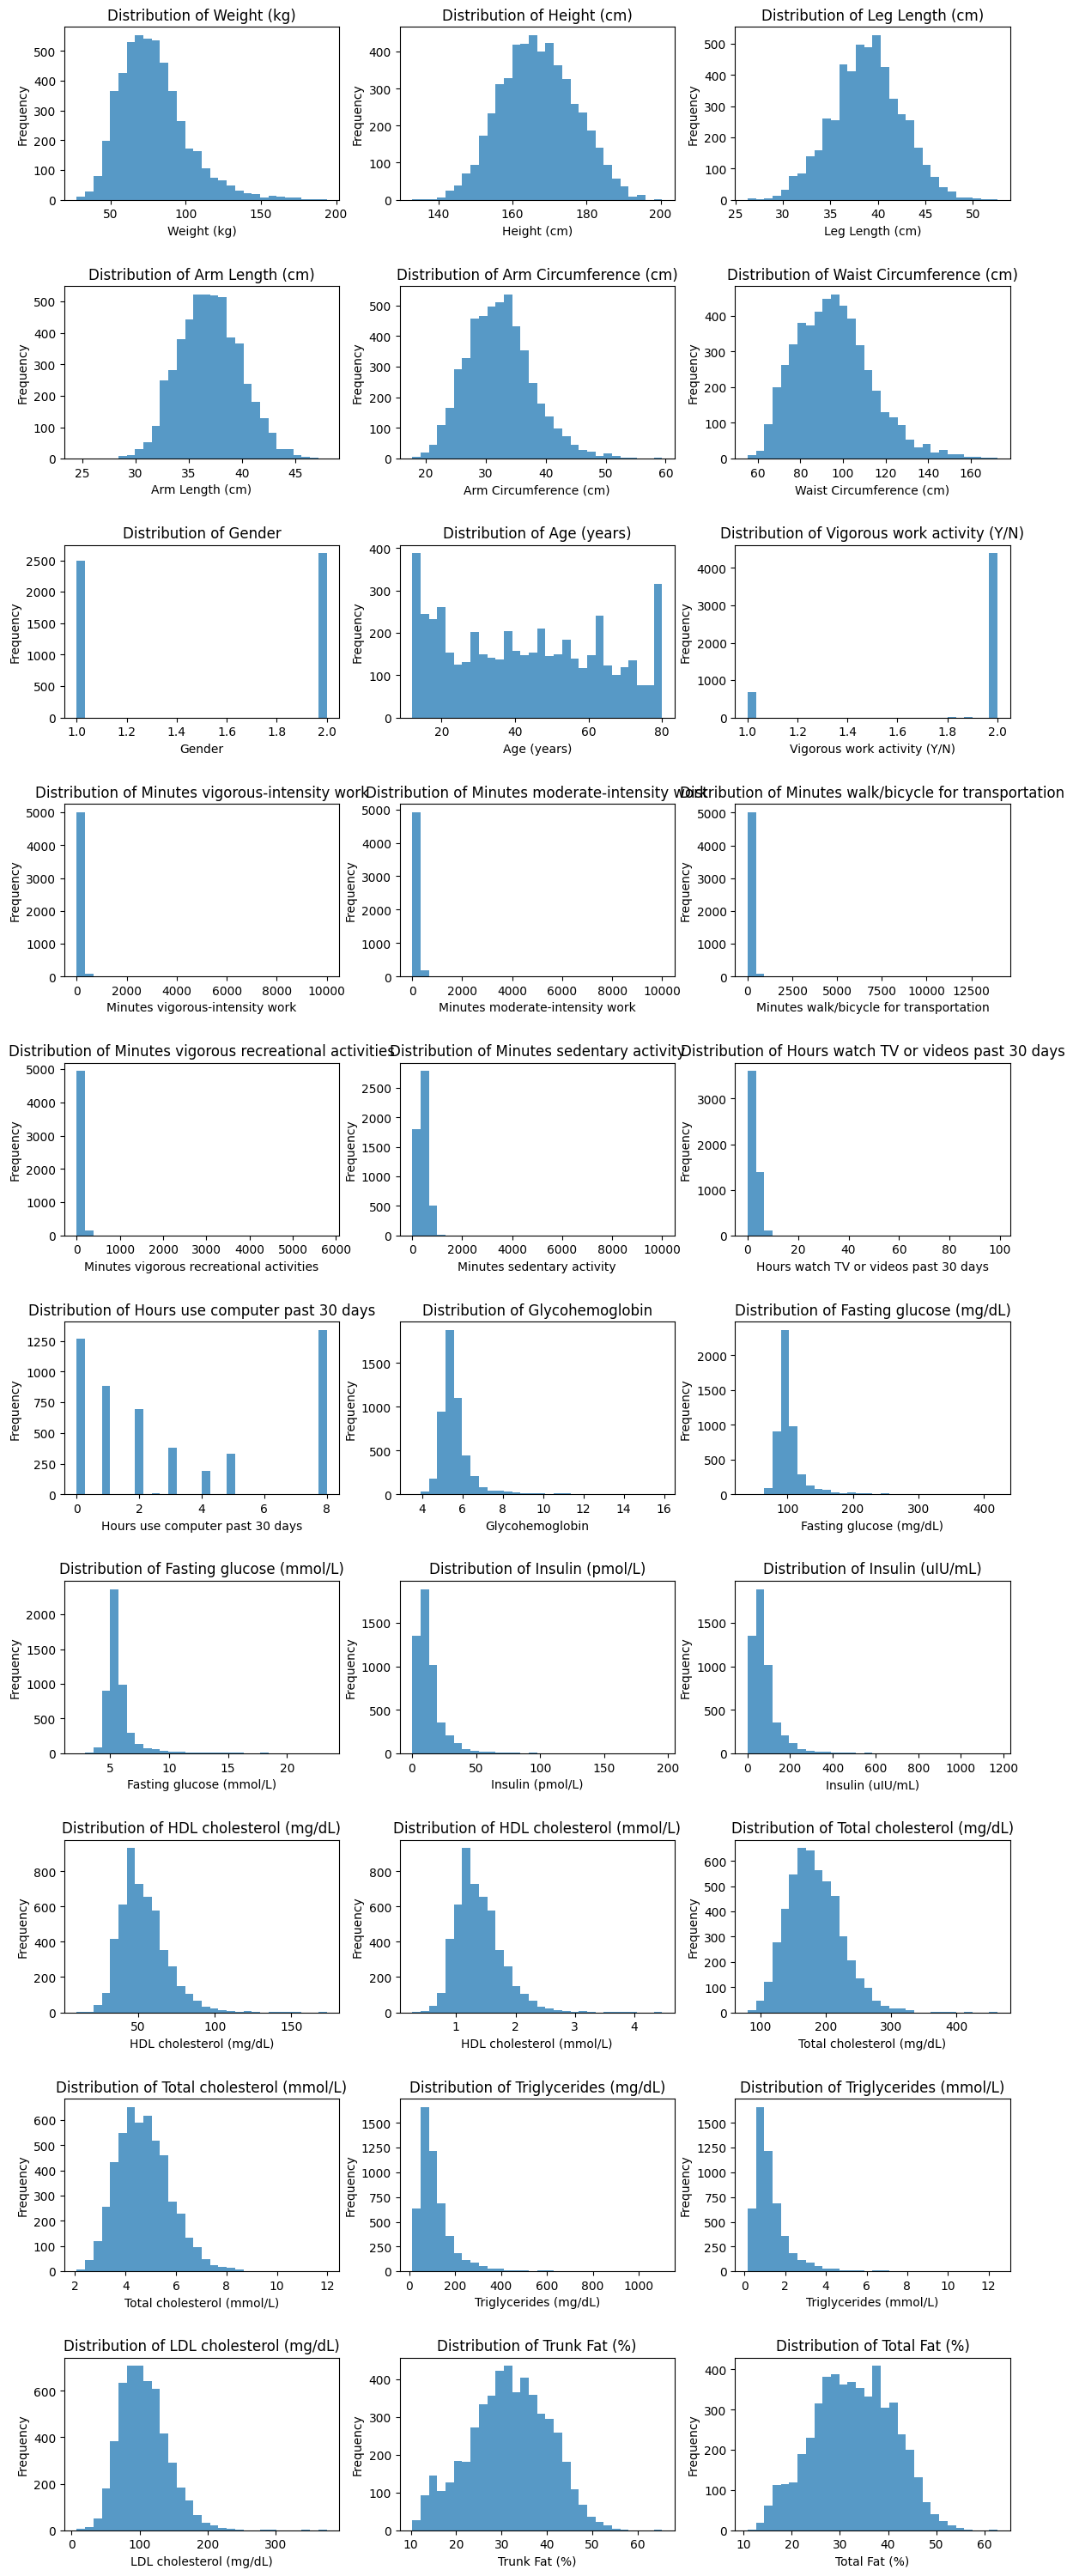

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called df
# Calculate the number of rows and columns for subplots
num_columns = len(df.columns)
num_rows = (num_columns - 1) // 3 + 1

# Create subplots for each column
fig, axs = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
fig.tight_layout(pad=2.0)

# Plot histograms for each column
for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df[column], bins=30, alpha=0.75)
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Distribution of ' + column)

# Hide any unused subplots
if num_columns % 3 != 0:
    for i in range(num_columns % 3, 3):
        fig.delaxes(axs[num_rows-1, i])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

In [42]:
df.to_csv('original.csv')

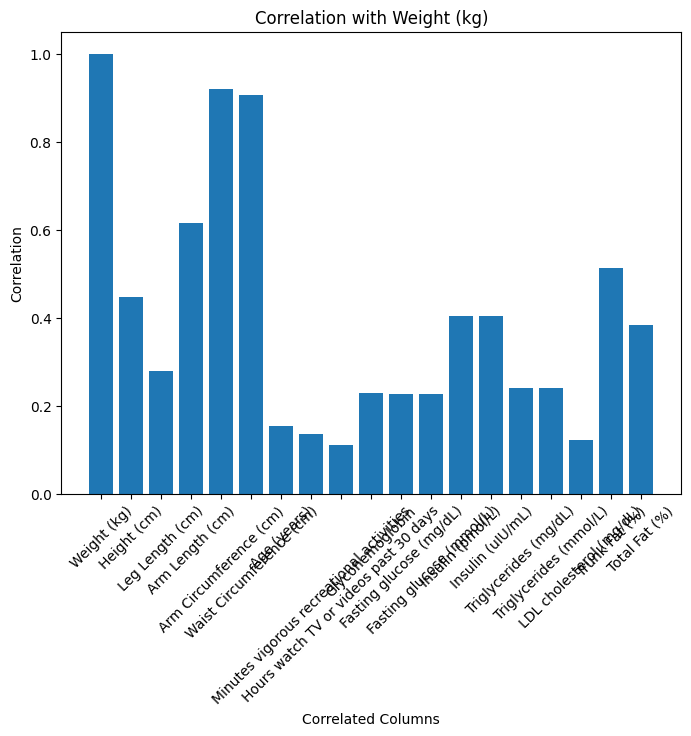

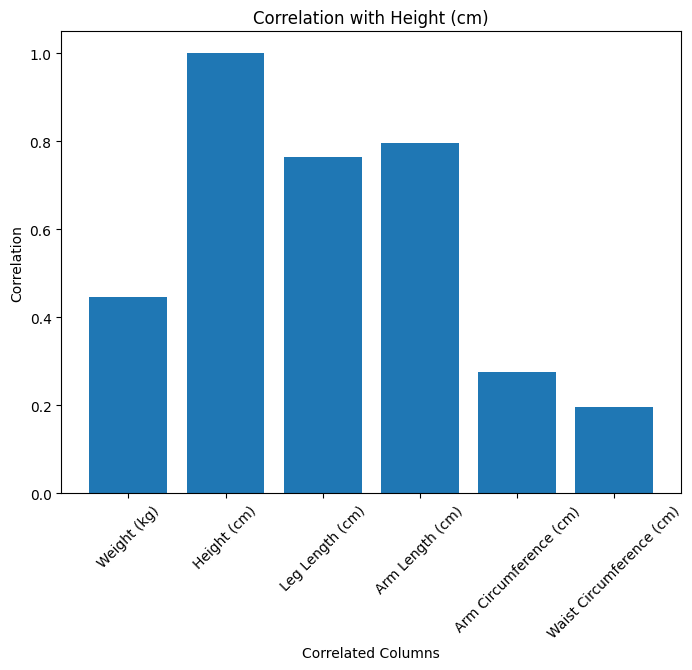

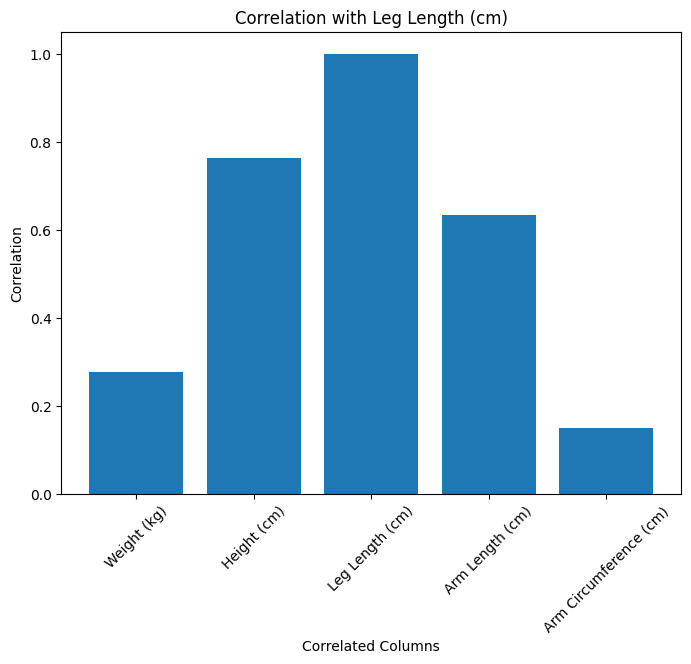

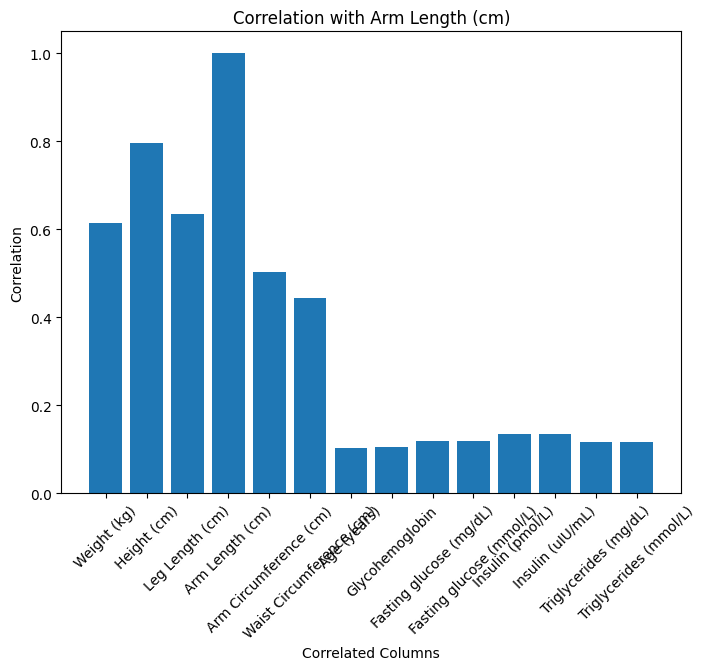

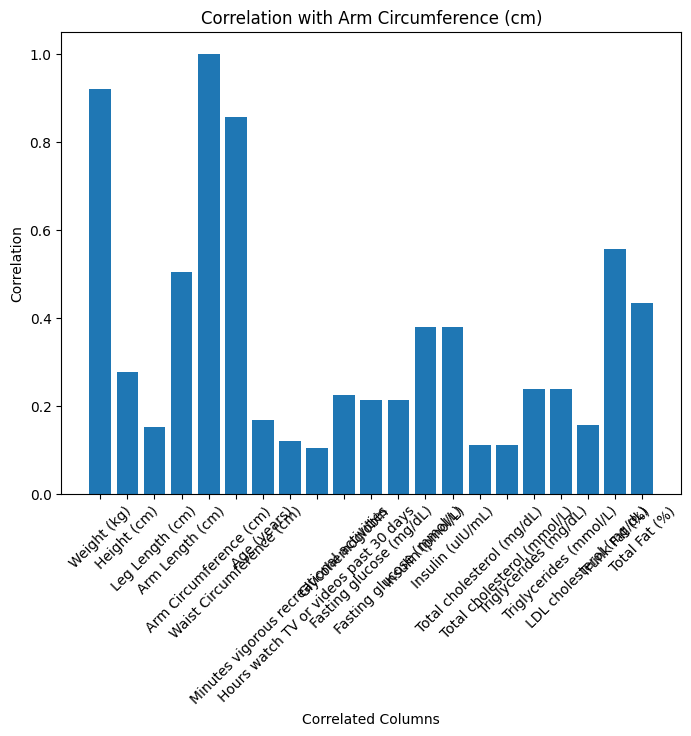

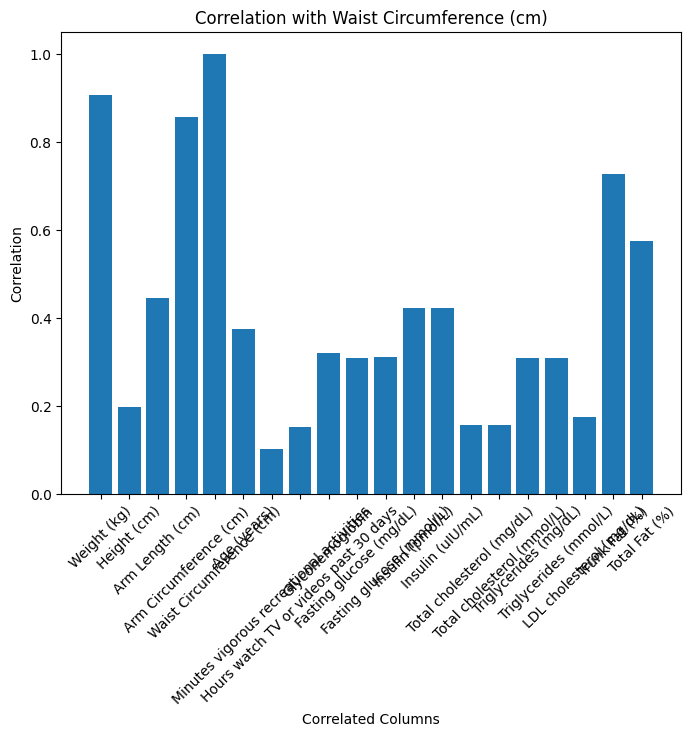

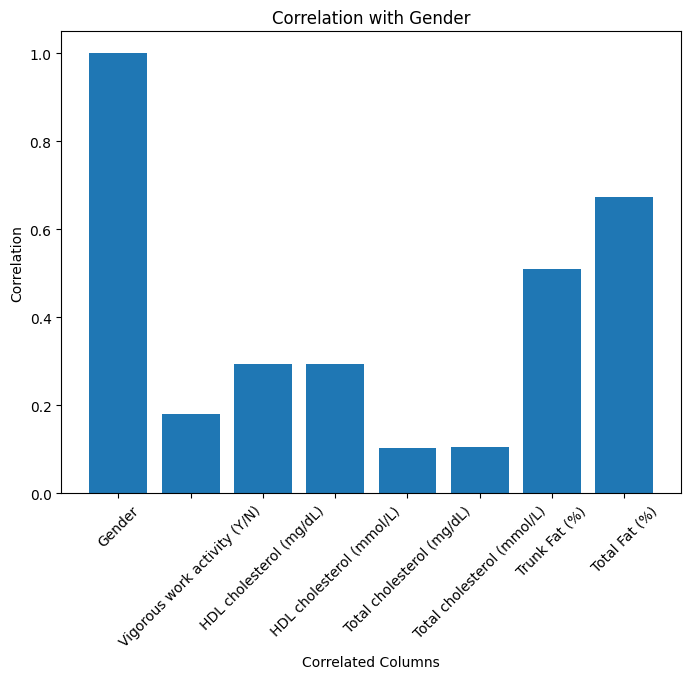

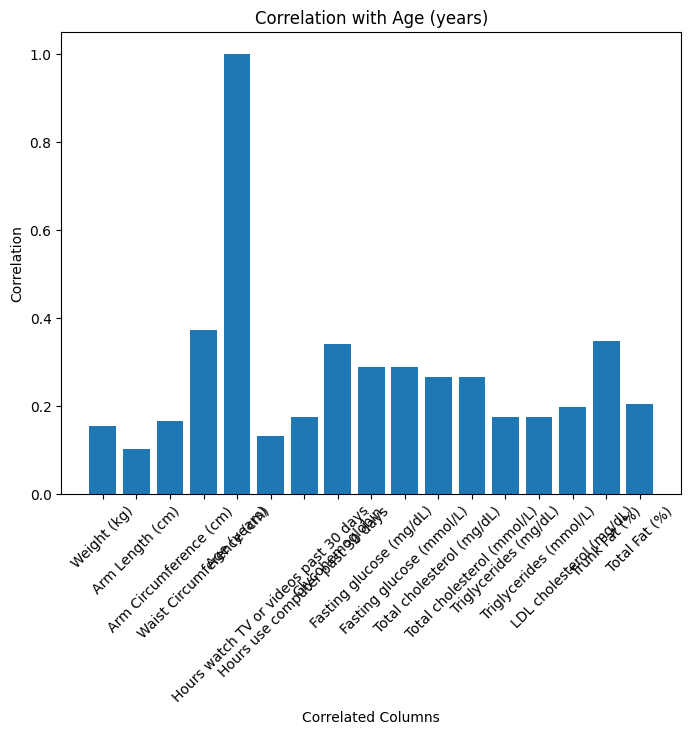

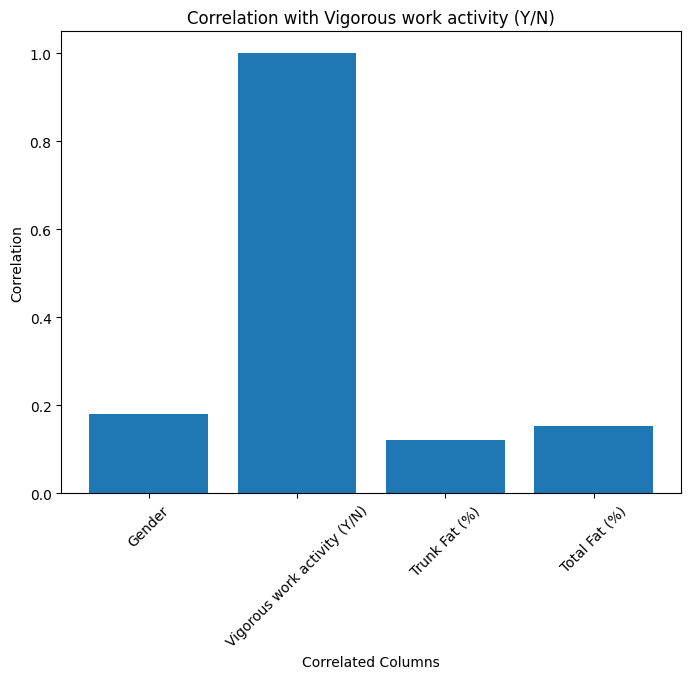

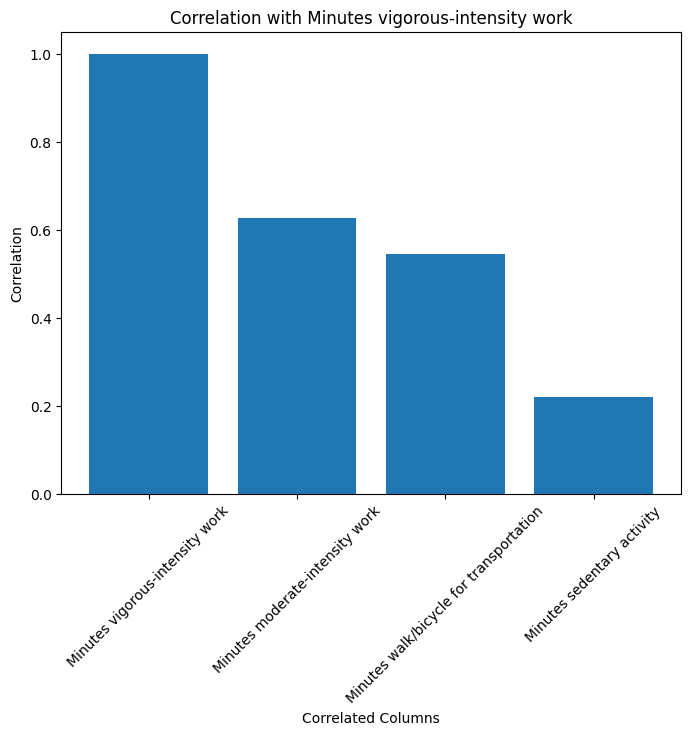

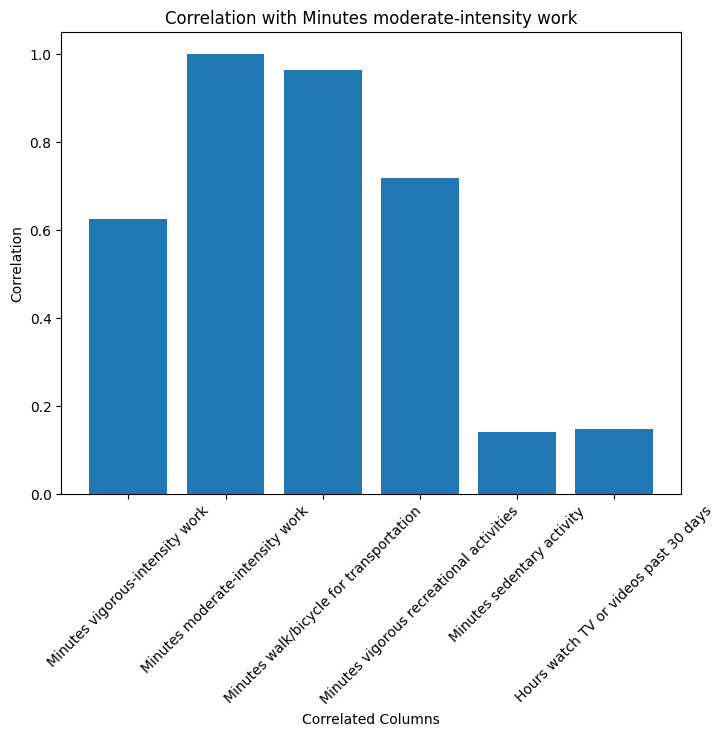

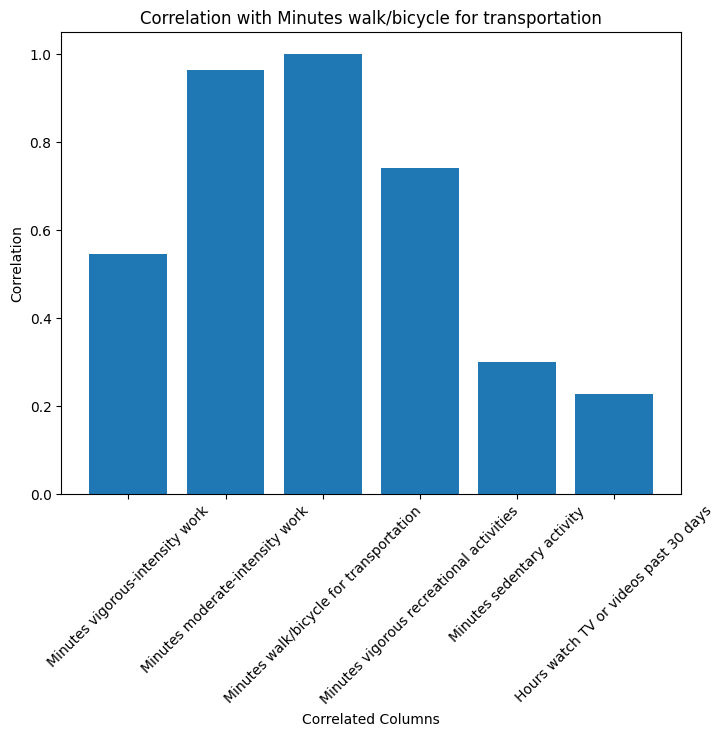

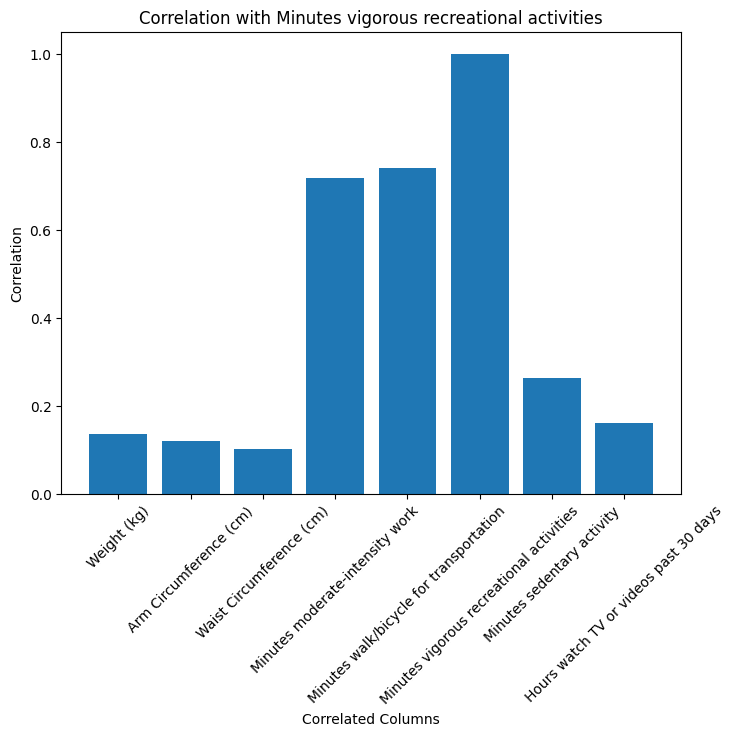

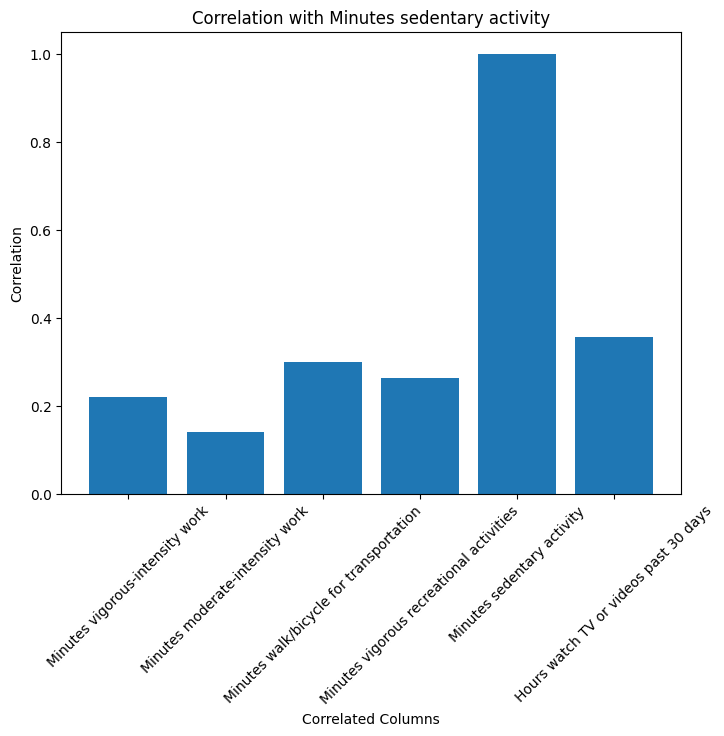

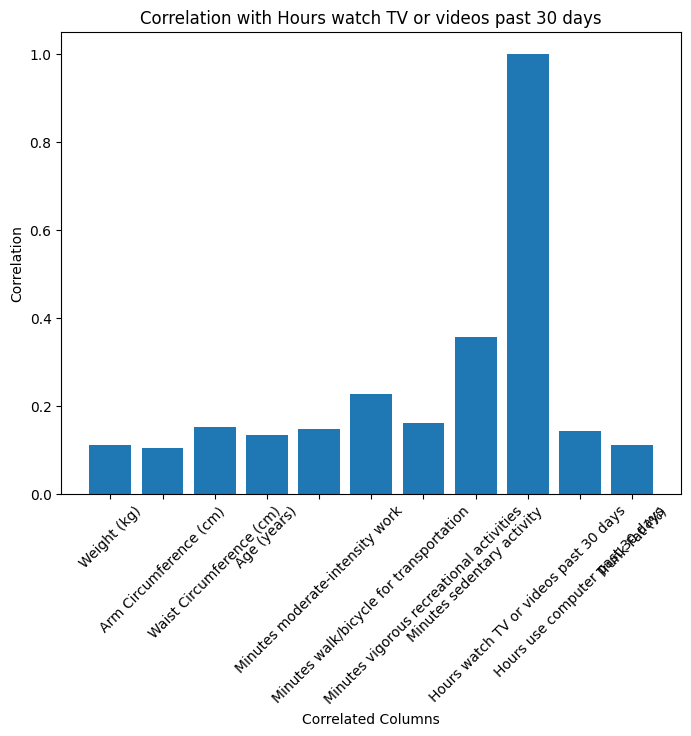

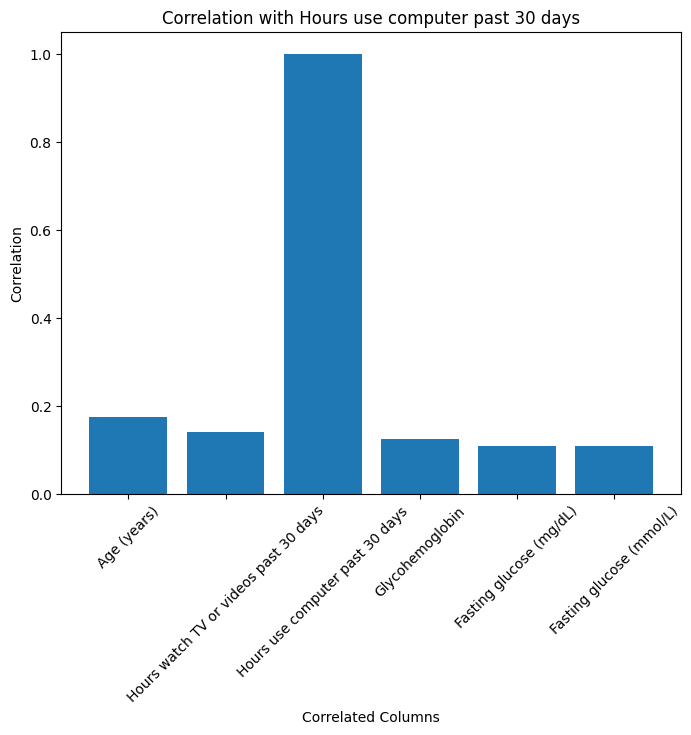

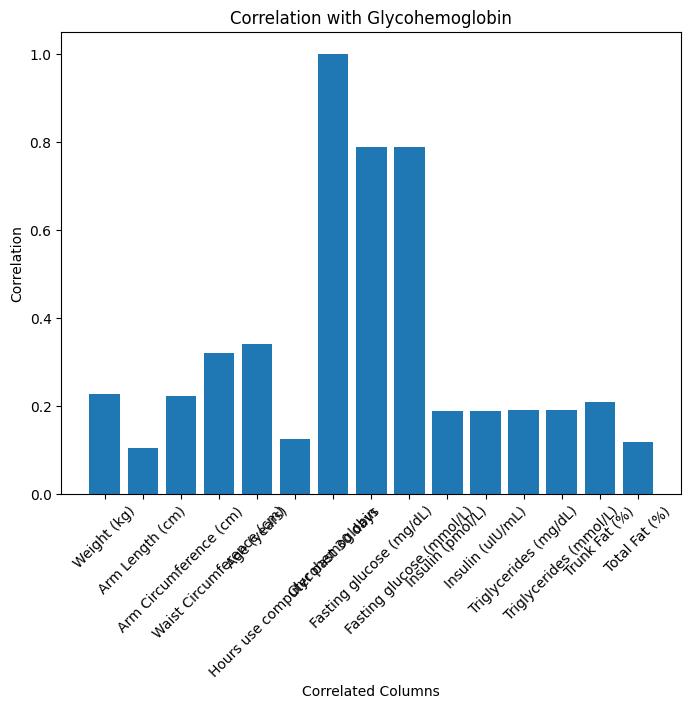

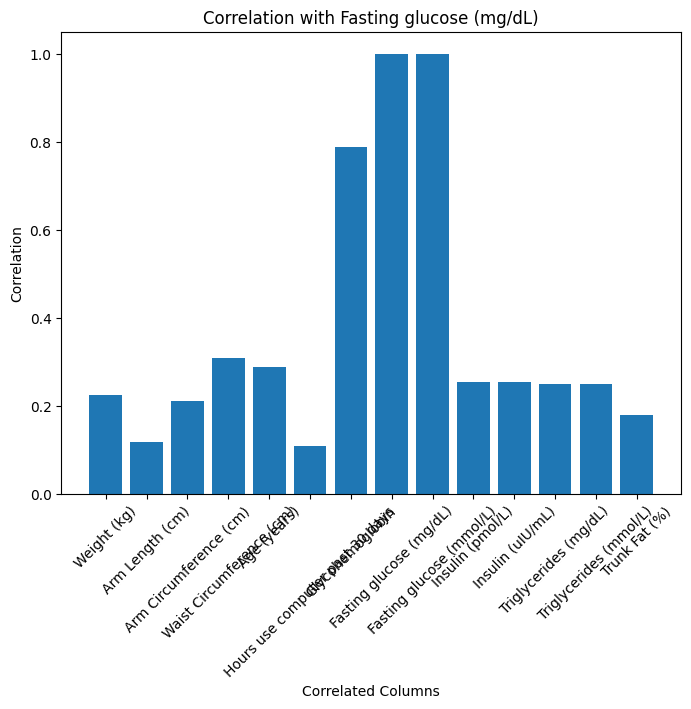

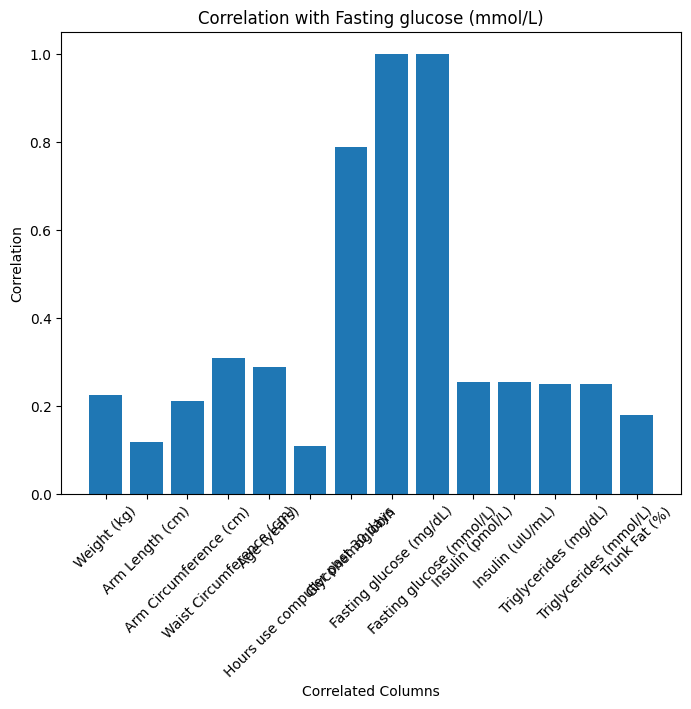

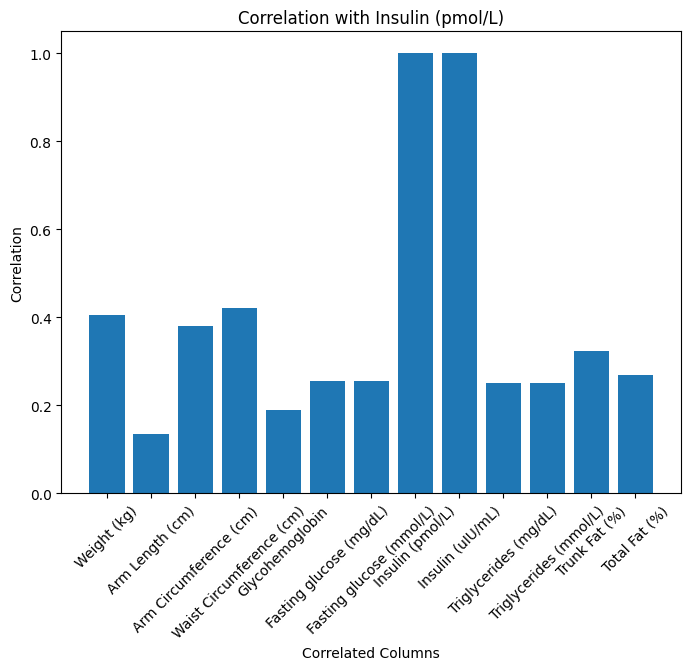

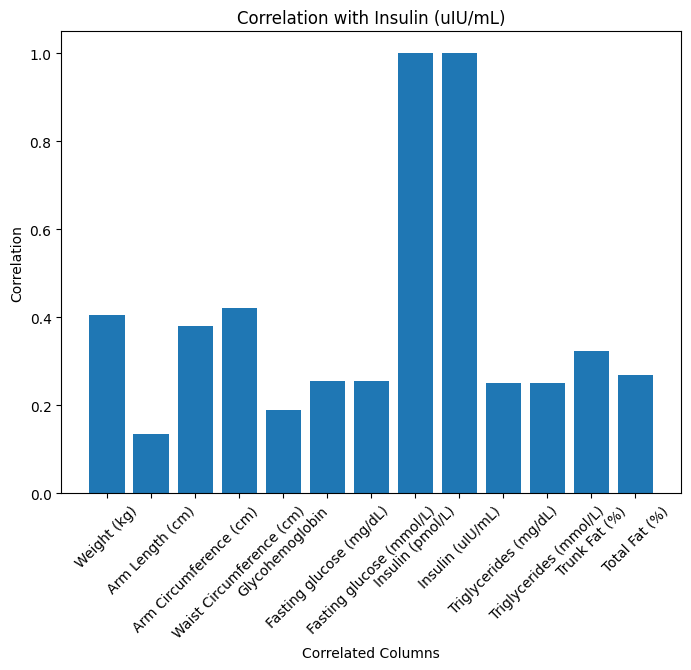

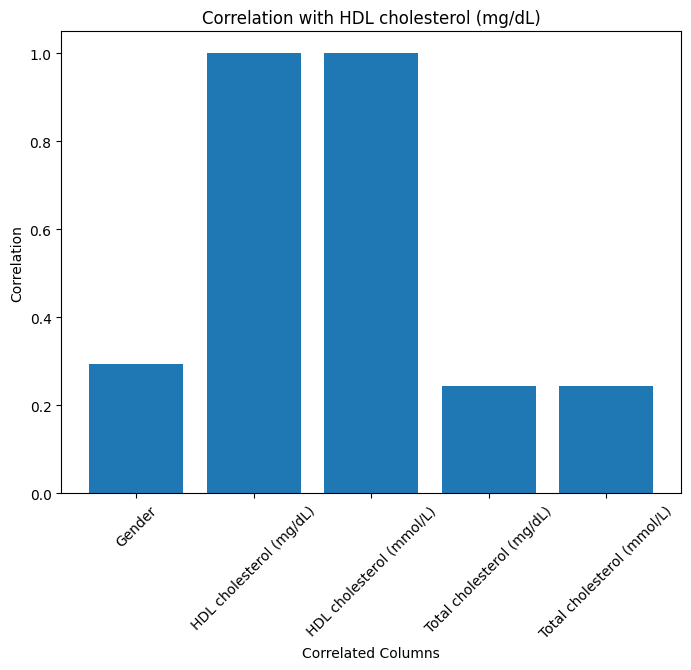

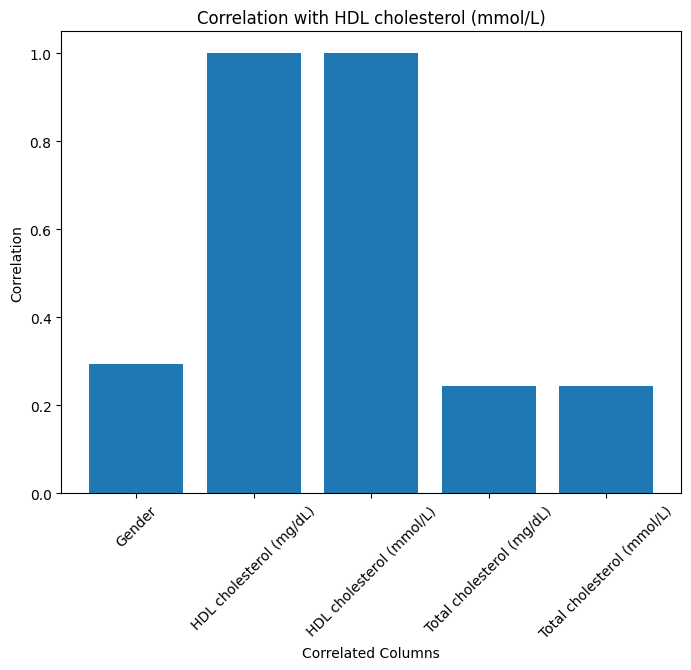

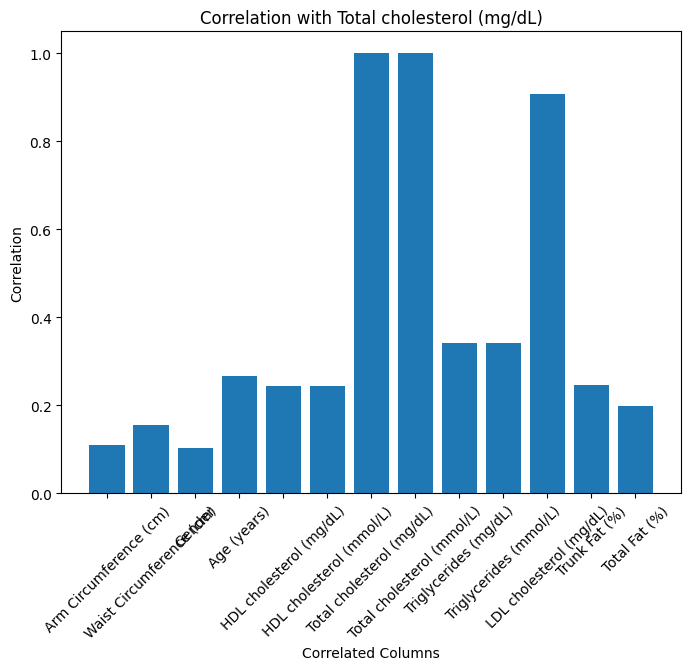

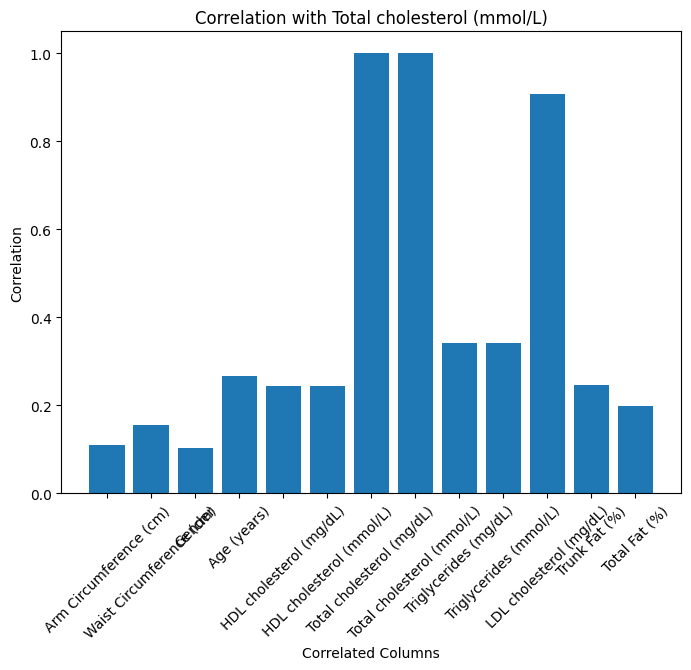

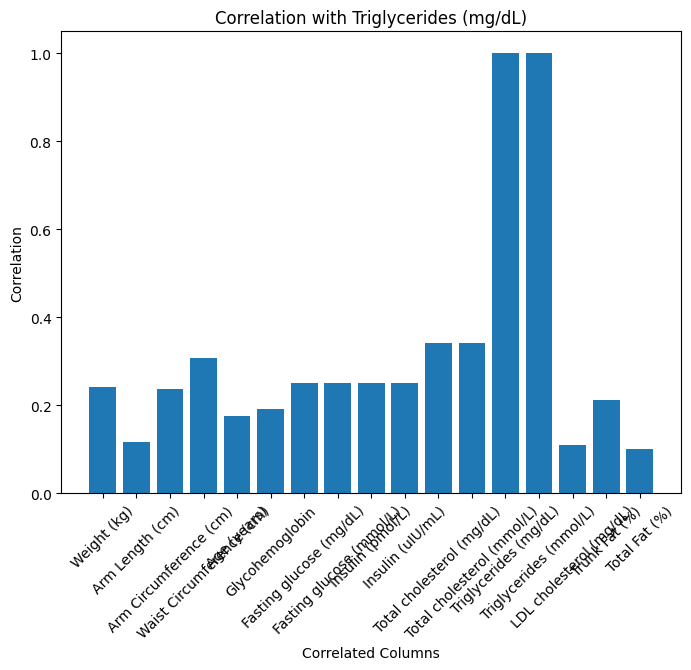

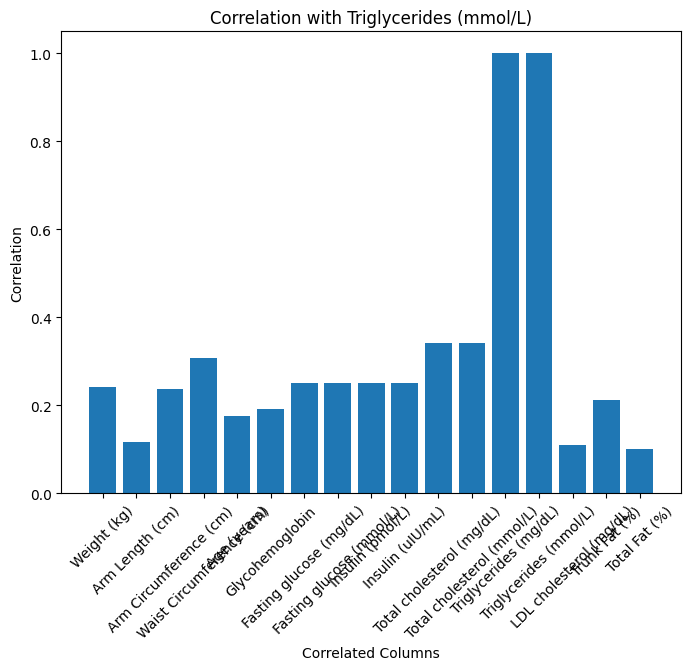

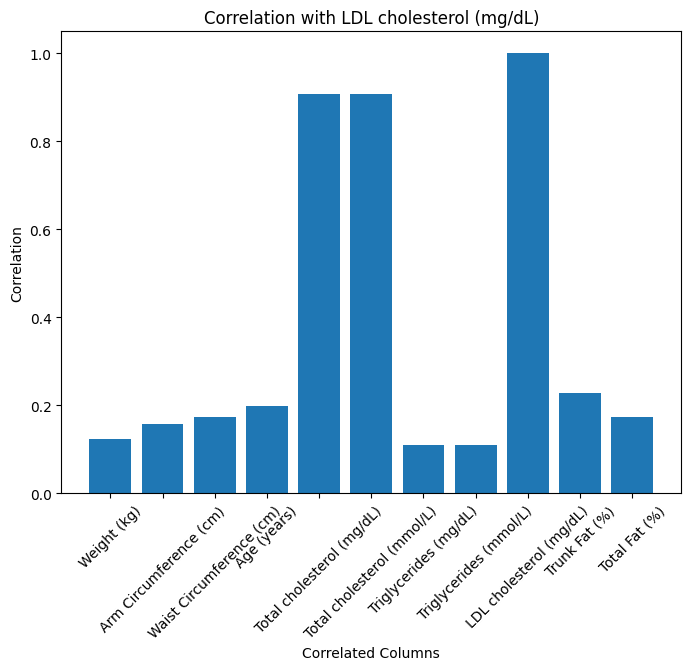

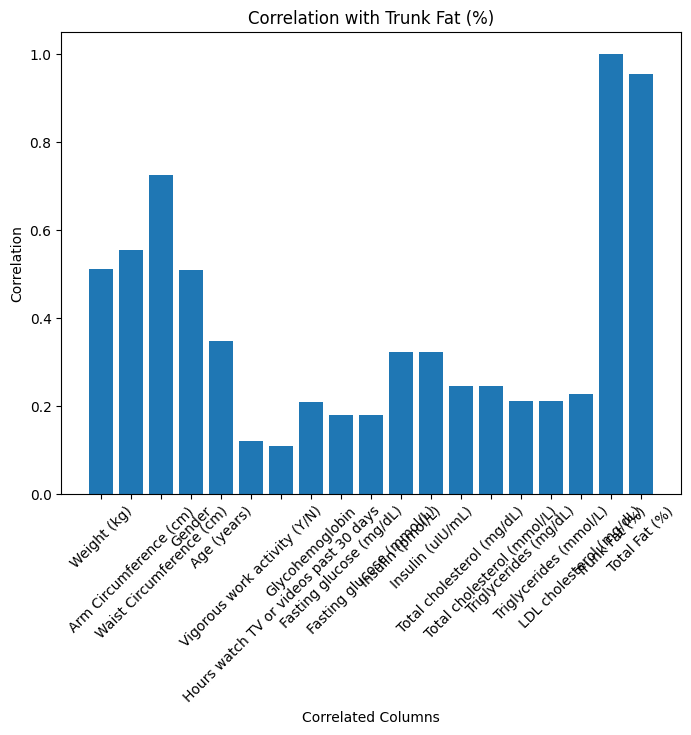

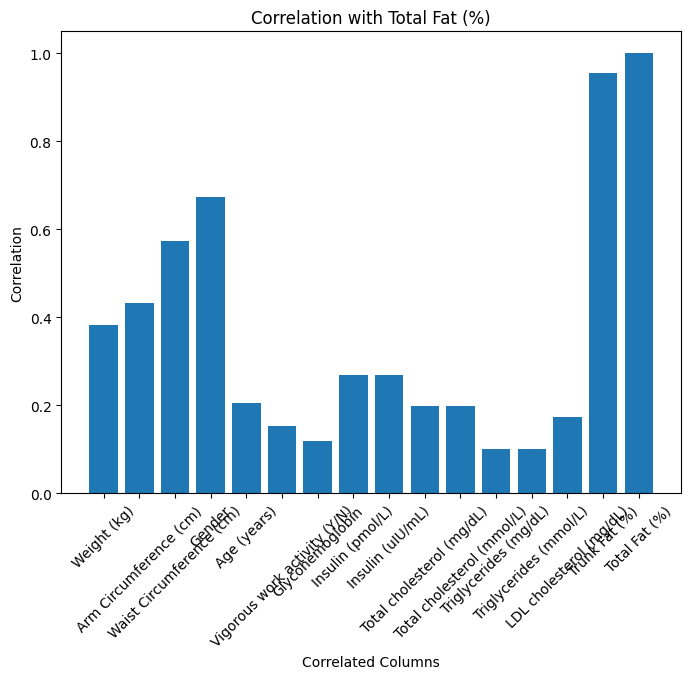

In [43]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_correlation(dataframe):
    corr_matrix = dataframe.corr()
    columns = dataframe.columns

    # Iterate over each column
    for col in columns:
        correlations = corr_matrix[col]
        correlated_cols = correlations[correlations > 0.1].index.tolist()

        if len(correlated_cols) > 1:  # At least two columns are correlated
            plt.figure(figsize=(8, 6))
            plt.bar(correlated_cols, correlations[correlated_cols])
            plt.xlabel('Correlated Columns')
            plt.ylabel('Correlation')
            plt.title(f'Correlation with {col}')
            plt.xticks(rotation=45)
            plt.show()

plot_correlation(df)

In [44]:
import pandas as pd
import random

def populate_instances(dataset, num_repetitions, noise_factor):
    populated_dataset = []
    
    # Calculate the frequency distribution of data
    freq_distribution = calculate_frequency_distribution(dataset)
    
    # Iterate over each instance in the dataset
    for idx, row in dataset.iterrows():
        # Repeat the instance multiple times
        for _ in range(num_repetitions):
            populated_instance = row.copy()
            
            # Maintain the frequency distribution of data
            for column in dataset.columns:
                data_value = row[column]
                
                # Add random noise to the data value
                noise = random.uniform(-noise_factor, noise_factor)
                noisy_value = data_value + noise
                
                # Update the instance with the noisy value
                populated_instance[column] = noisy_value
                
                # Update the frequency distribution
                freq_distribution[column][data_value] -= 1
                
                if noisy_value not in freq_distribution[column]:
                    freq_distribution[column][noisy_value] = 0
                    
                freq_distribution[column][noisy_value] += 1
            
            populated_dataset.append(populated_instance)
    
    return pd.DataFrame(populated_dataset)

def calculate_frequency_distribution(dataset):
    freq_distribution = {}
    
    for column in dataset.columns:
        freq_distribution[column] = dataset[column].value_counts().to_dict()
    
    return freq_distribution

# Example usage
populated_df = populate_instances(df, num_repetitions=4, noise_factor=0.1)

In [45]:
populated_df.to_csv('populated.csv')

In [46]:
df = populated_df

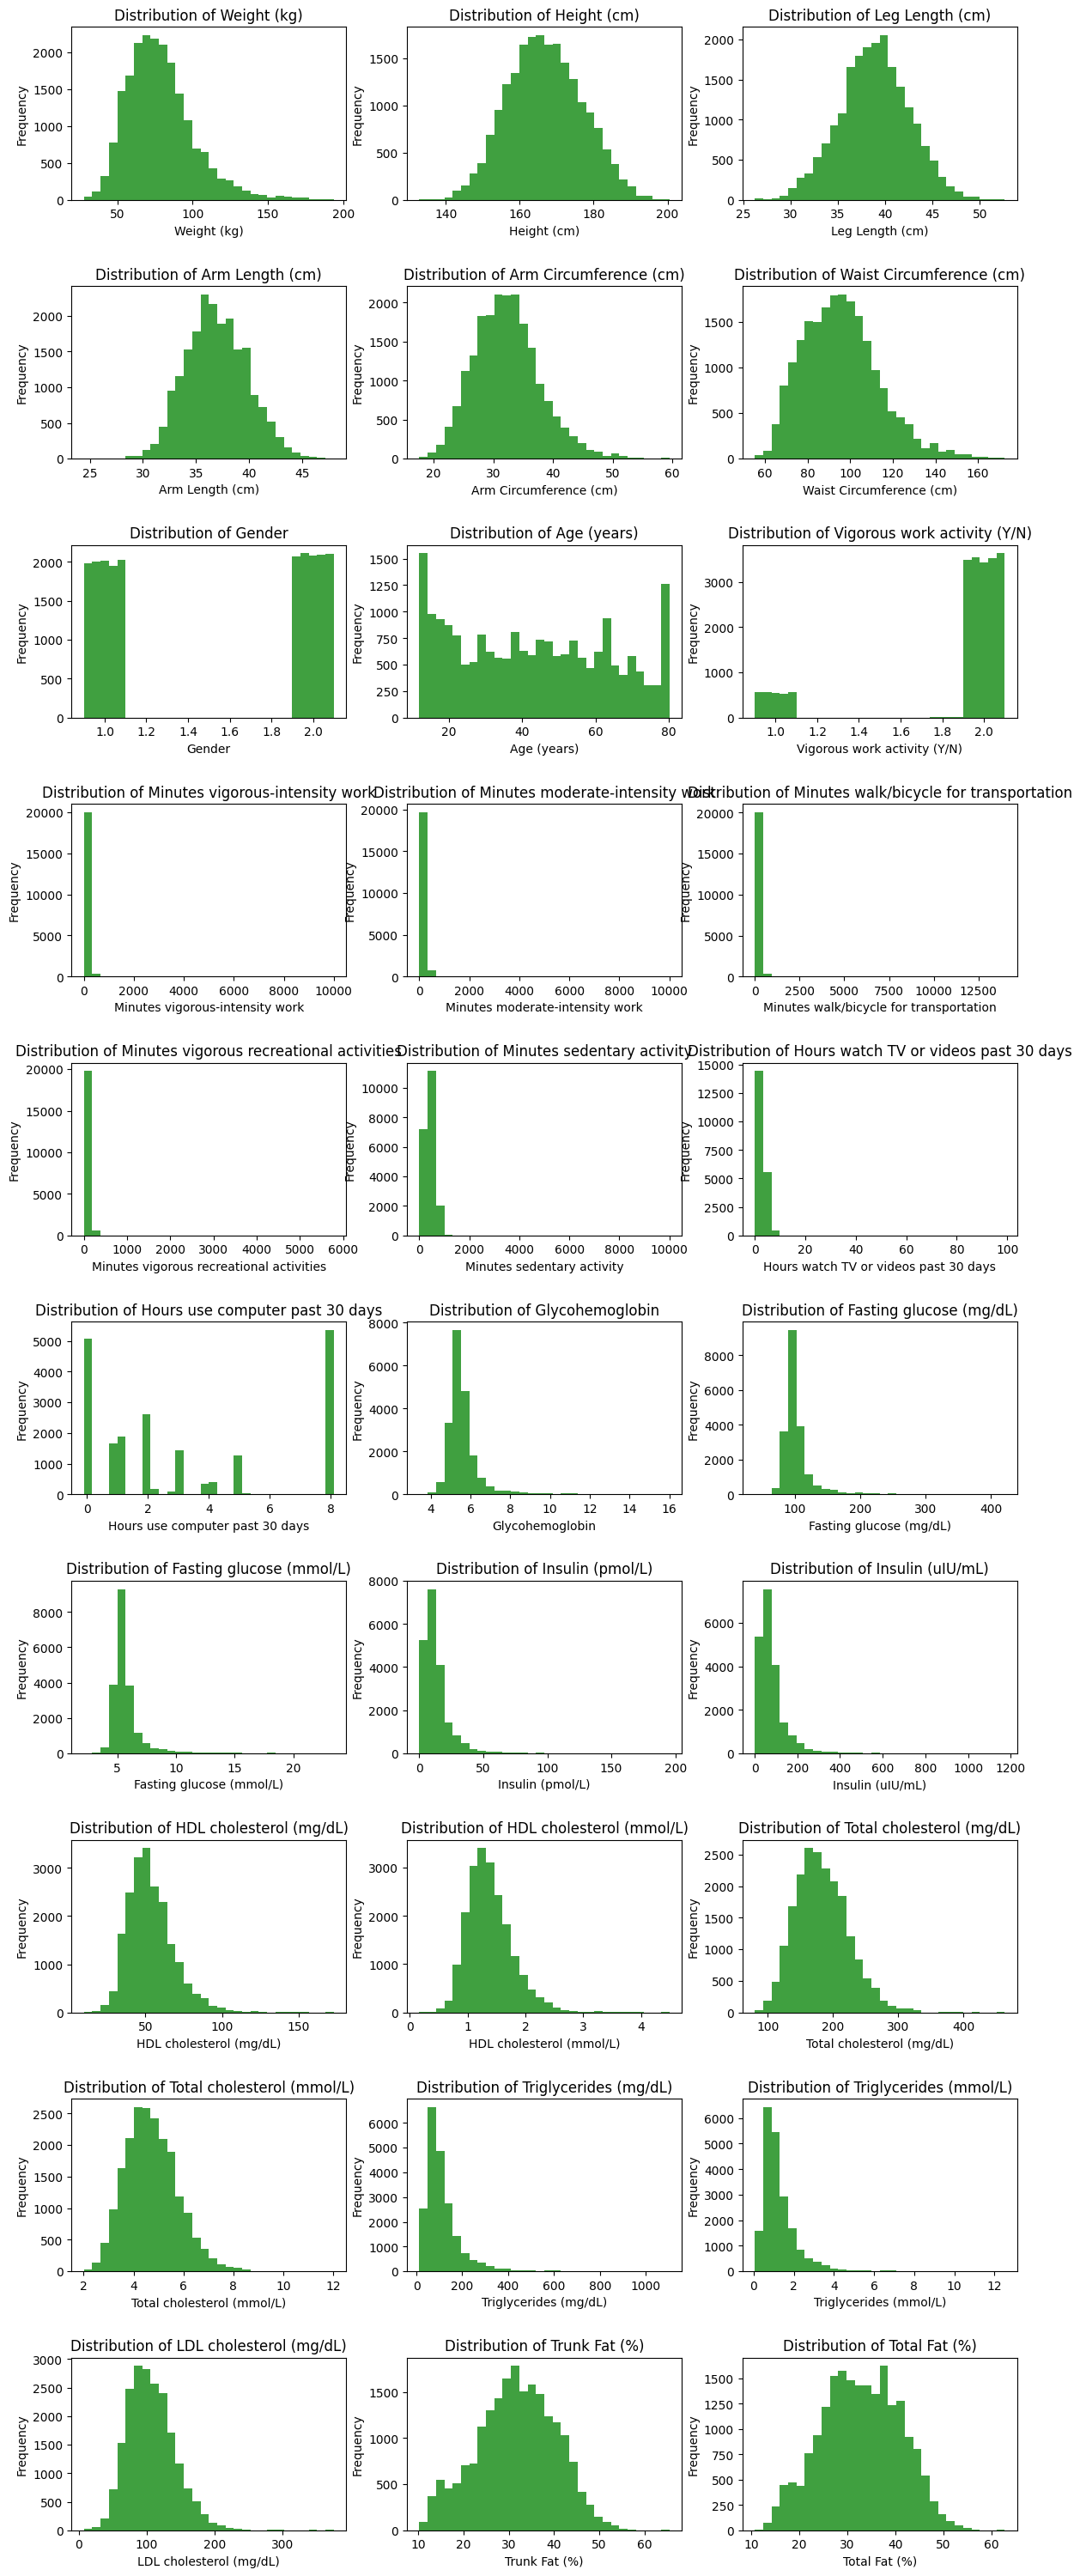

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called df
# Calculate the number of rows and columns for subplots
num_columns = len(df.columns)
num_rows = (num_columns - 1) // 3 + 1

# Create subplots for each column
fig, axs = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
fig.tight_layout(pad=2.0)

# Plot histograms for each column
for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    axs[row, col].hist(df[column], bins=30, alpha=0.75, color = 'g')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('Distribution of ' + column)

# Hide any unused subplots
if num_columns % 3 != 0:
    for i in range(num_columns % 3, 3):
        fig.delaxes(axs[num_rows-1, i])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()